In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils
from keras.callbacks import TensorBoard
from keras import backend as K


import tensorflow as tf
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot

import numpy as np
import scipy.io
from PIL import Image
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing
from IPython import display
import time

/home/xd/ws/tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/xd/ws/tf/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
root_dir = 'dataset_withlabel/'
listing = os.listdir(root_dir)
maxval = 0.46
classes = {'none':0, 'left':1, 'right':2, 'click':3, 'wrist':4}

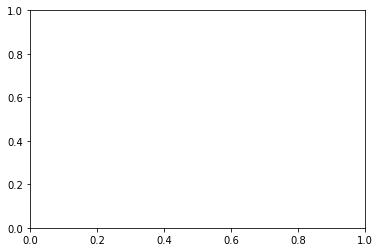

In [3]:
frames = []
labels = []
nongesture_count = 0
samples_per_class = np.zeros((5,1))

fig = plt.figure()
ax = fig.add_subplot(111)

for file in listing:
    file = root_dir + file
    data = scipy.io.loadmat(file)
    images = data['images']
    label = data['labels']
    num_frame = images.shape[0]
    
    rdm = np.zeros((64, 64))
    gt = 0
    nonzero_idx = np.nonzero(label)
    nonzero_idx_beg = np.min(nonzero_idx)
    nonzero_idx_end = np.max(nonzero_idx)
    gt = np.max(label)
    for i in range(nonzero_idx_beg, nonzero_idx_end):
        imgi = images[i].reshape(64, 64)
        rdm = np.maximum(rdm, imgi)
        
            
    background_rdm = np.zeros((64, 64))
    for i in range(nonzero_idx_end, num_frame):
        imgi = images[i].reshape(64, 64)
        rdm = np.maximum(rdm, imgi)
        rdm[:10,:] = np.min(rdm)
        frames.append(rdm)
        labels.append(gt)
        samples_per_class[gt] = samples_per_class[gt] + 1
        
        if gt == 4:
            frames.append(rdm)
            labels.append(gt)
            samples_per_class[gt] = samples_per_class[gt] + 1
            
            frames.append(rdm)
            labels.append(gt)
            samples_per_class[gt] = samples_per_class[gt] + 1
        
        if samples_per_class[0] < 30000:
            background_rdm = np.maximum(background_rdm, imgi)
            background_rdm[:10,:] = np.min(background_rdm)
            frames.append(background_rdm)
            labels.append(0)
            samples_per_class[0] = samples_per_class[0] + 1
#     ax.imshow(rdm)
#     title = str(i) + '/' + str(num_frame) + ', label:' + str(gt)
#     plt.title(title)
#     display.clear_output(wait=True)
#     display.display(fig)
#     time.sleep(0.1)

In [4]:
num_samples = len(frames)
# frames_arr =np.array(frames)

In [5]:
print(num_samples)

143547


In [6]:
gt = np.max(label)
print(gt)

2


In [7]:
X = np.array(frames)

In [8]:
labels = np.array(labels)

In [9]:
samples_per_class

array([[30000.],
       [27222.],
       [25347.],
       [37203.],
       [23775.]])

In [6]:
img_rows, img_cols, img_depth = 64, 256, 2
batch_size = 32
num_classes = 5
num_epoch = 20

In [11]:
y = np_utils.to_categorical(labels, num_classes)
X = X.reshape(num_samples, 64, 64, 1)

num_filters = [32, 32]
num_pool = [2, 2]
num_conv = [5, 3]

X = X.astype('float32')
X -= np.mean(X)
X /= np.max(X)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'gestures' is not defined

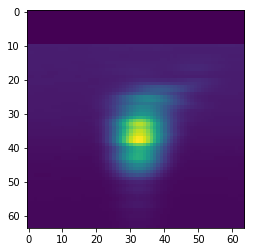

In [13]:
gesture_rdm = np.zeros((5, 64, 64))
for k in range(len(y_val)):
    a = X_val[k]
    b = a.reshape(64,64)
    gt_val = np.where(y_val[k]==1)[0][0]
    gesture_rdm[gt_val] = gesture_rdm[gt_val] + b
    
for i in range(0, 5):
    plt.figure()
    plt.imshow(gesture_rdm[i])
    plt.title(gestures[i])

In [21]:
K.clear_session()
model = Sequential()
print('input shape', img_rows, 'rows', img_cols, 'cols')

model.add(Conv2D(8,
                 (2, 2),
                 strides=(2,2),
                 input_shape=(img_rows, img_cols, 2),
                 activation='relu',
                 padding='valid'))

# model.add(MaxPooling2D(pool_size=4))
model.add(Dropout(0.5))

model.add(Conv2D(16,
                 (2, 2),
                 strides=(2,2),
                 activation='relu',
                 padding='valid'))

# model.add(MaxPooling2D(pool_size=4))
model.add(Dropout(0.5))

model.add(Conv2D(32,
                 (2, 2),
                 strides=(2,2),
                 activation='relu',
                 padding='valid'))

# model.add(MaxPooling2D(pool_size=4))
model.add(Dropout(0.5))

model.add(Conv2D(64,
                 (2, 2),
                 strides=(2,2),
                 input_shape=(img_rows, img_cols, img_depth),
                 activation='relu',
                 padding='valid'))

# model.add(MaxPooling2D(pool_size=4))
model.add(Dropout(0.5))

model.add(Conv2D(128,
                 (2, 2),
                 strides=(2,2),
                 input_shape=(img_rows, img_cols, img_depth),
                 activation='relu',
                 padding='valid'))

# model.add(MaxPooling2D(pool_size=4))
model.add(Dropout(0.5))

model.add(Conv2D(256,
                 (2, 2),
                 strides=(2,2),
                 input_shape=(img_rows, img_cols, img_depth),
                 activation='relu',
                 padding='valid'))

# model.add(MaxPooling2D(pool_size=4))
model.add(Dropout(0.5))
# model.add(Conv2D(64,
#                  (3, 3),
#                  input_shape=(img_rows, img_cols, 1),
#                  activation='relu',
#                  padding='valid'))

# model.add(MaxPooling2D(pool_size=2, strides=2))
# model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(40, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, kernel_initializer='normal'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['mse', 'accuracy'])

model.summary()

input shape 64 rows 256 cols
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 128, 8)        72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 128, 8)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 64, 16)        528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 64, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 32, 32)         2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 32, 32)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 16, 64) 

In [15]:
hist = model.fit(X_train,
                 y_train,
                 validation_data=(X_val, y_val),
                 batch_size=batch_size,
                 epochs=num_epoch,
                 shuffle=True,
                 callbacks=[TensorBoard(log_dir='./tmp/log')]
)

Train on 114837 samples, validate on 28710 samples
Epoch 1/20
114837/114837 [==============================] - 20s 177us/step - loss: 0.9795 - mean_squared_error: 0.1021 - acc: 0.5931 - val_loss: 0.5017 - val_mean_squared_error: 0.0544 - val_acc: 0.8144
Epoch 2/20
114837/114837 [==============================] - 20s 171us/step - loss: 0.6700 - mean_squared_error: 0.0701 - acc: 0.7414 - val_loss: 0.3464 - val_mean_squared_error: 0.0374 - val_acc: 0.8876
Epoch 3/20
114837/114837 [==============================] - 20s 172us/step - loss: 0.5271 - mean_squared_error: 0.0552 - acc: 0.8025 - val_loss: 0.2798 - val_mean_squared_error: 0.0290 - val_acc: 0.9254
Epoch 4/20
114837/114837 [==============================] - 20s 170us/step - loss: 0.4426 - mean_squared_error: 0.0458 - acc: 0.8375 - val_loss: 0.1949 - val_mean_squared_error: 0.0198 - val_acc: 0.9500
Epoch 5/20
114837/114837 [==============================] - 20s 171us/step - loss: 0.3978 - mean_squared_error: 0.0404 - acc: 0.8588 - va

In [137]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']

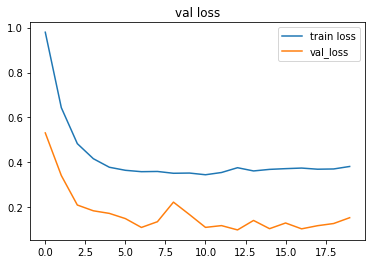

In [138]:
plt.plot(train_loss); plt.title('train loss')
plt.plot(val_loss); plt.title('val loss')
plt.legend(['train loss', 'val_loss'])

(0, 1)

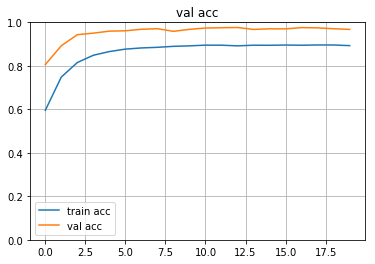

In [145]:
plt.plot(train_acc); plt.title('train acc')
plt.plot(val_acc); plt.title('val acc')
plt.legend(['train acc', 'val acc'])
plt.grid(True)
plt.ylim(0,1)

In [149]:
gestures = ['none', 'left', 'right', 'click', 'wrist']

Text(0.5,1,'wrist')

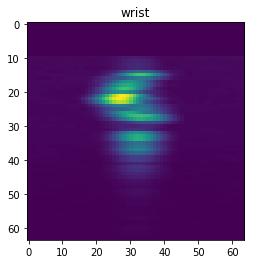

In [164]:
k = 5
a = X_val[k]
b = a.reshape(64,64)
plt.imshow(b)
gt_val = np.where(y_val[k]==1)[0][0]
plt.title(gestures[gt_val])

In [15]:
np.save('X.npy', X)
np.save('y.npy', y)